# Imersão Dados - Alura

## Aula 1 - Introdução ao Python para Ciência de Dados

Nesta primeira aula vamos iniciar o estudo de Python com foco em Ciência de Dados. Vamos ver como carregar um _DataSet_ a partir de uma URL, os métodos mais básicos para termos uma noção geral sobre o _DataFrame_ e quais são as bibliotecas que não podem faltar.

Vamos analisar um conjunto de dados com informações sobre o ENEM de 2019, que além das notas em cada uma das provas que compõem o exame, possui também dados geográficos e socioeconômicos dos candidatos.

Apesar dos dados que vamos utilizar serem apenas uma amostra do universo de candidatos, ela é representativa o suficiente (eu espero hehe) e servirá bem ao nosso propósito.

### Índice

- [Carregando os dados](#carregando-os-dados)
- [Análise exploratória](#análise-exploratória)
- [Visualização de dados](#visualização-de-dados)
- [Grandezas estátisticas](#grandezas-estátisticas)

### Carregando os dados

A primeira coisa a fazer para trabalhar com os dados no ENEM é obtêlos, e no caso vamos utilizar uma amostra já separada pelo pessoal da Alura. Como será uma análise com fins didáticos, com foco nos métodos e ferramentas, não há necessidade de utilizarmos todo o conjunto de dados (cujo tamanho fica na casa do GB, acho).

Logo aqui já vamos começas utilizando uma biblioteca do Python desenvolvida para lidar com conjuntos de dados, o [`pandas`](https://pandas.pydata.org/). Vamos importar a biblioteca e definir um _alias_ para ela (já que vamos utilizar bastante) e importar um arquivo do tipo CSV a partir de uma URL:

In [ ]:
import pandas as pd

# lendo o arquivo através da URL, resultado eh um DataFrame
dados = pd.read_csv('https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true')
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
# dimensoes do dataset (linhas x coluans)
dados.shape

(127380, 136)

In [ ]:
# selecionando uma coluna especifica, resultado eh uma serie do Panda
dados['NU_INSCRICAO']

0         190001004661
1         190001004674
2         190001004722
3         190001004735
4         190001004776
              ...     
127375    190006120035
127376    190006120036
127377    190006120037
127378    190006120060
127379    190006120170
Name: NU_INSCRICAO, Length: 127380, dtype: int64

In [ ]:
# todas as colunas do df
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [ ]:
# para selecionar mais de uma coluna devemos passar seus nomes dentro de uma lista
dados[['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA']]

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA
0,1506138,Redenção
1,1504208,Marabá
2,1501402,Belém
3,1507300,São Félix do Xingu
4,1500800,Ananindeua
...,...,...
127375,3142700,Montalvânia
127376,2902807,Barra da Estiva
127377,2927408,Salvador
127378,2930709,Simões Filho


### Análise exploratória

Vamos iniciar essa parte analisando a geografia dos candidatos. Primeiro vamos obter os estados de residência deles, basta selecionar a coluna que armazena esta informação:

In [ ]:
# estados de todos candidatos
dados['SG_UF_RESIDENCIA']

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

Se removermos todas as linhas repetidas veremos que todos os estados tem candidatos:

In [ ]:
# estados com candidatos
estados_unicos = dados['SG_UF_RESIDENCIA'].unique()
print(estados_unicos.size)
estados_unicos

27


array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

Agora vamos contar quantos candidatos cada estado tem:

In [ ]:
# canditos por estado
candidatos_por_estado = dados['SG_UF_RESIDENCIA'].value_counts()
candidatos_por_estado

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

Para avaliar a proporção de candidatos para cada estado, vamos definir uma função anônima, caso seja necessário fazer essa conta  novamento. E vamos definir uma função para apresentar os dados de forma mais bonitinha:

In [ ]:
# funcão anônima para determinar proporcao de contagem de valores
proporcao_contagem_coluna = lambda coluna: (coluna.value_counts() / coluna.value_counts().sum()) * 100

# apresentação da proporção
def imprime_proporcao(proporcao, ordenado=False, casas_decimais=2):
    lista_a_percorrer = proporcao.sort_index().index if ordenado else proporcao.index
    print("Grandeza\tProporção")
    for estado in lista_a_percorrer:
        print("{}\t\t{}%".format(estado, round(proporcao[estado], casas_decimais)))
    print(f"Total\t\t{round(proporcao.sum(), casas_decimais)}%")


# proporção de candidatos por estado
proporcao_candidatos_estado = proporcao_contagem_coluna(dados['SG_UF_RESIDENCIA'])
imprime_proporcao(proporcao_candidatos_estado)

Grandeza	Proporção
SP		15.91%
MG		10.64%
BA		7.88%
RJ		6.65%
CE		5.79%
PA		5.63%
PE		5.45%
MA		4.35%
RS		4.29%
PR		4.13%
GO		3.35%
PB		2.9%
PI		2.38%
RN		2.32%
AM		2.21%
SC		2.1%
ES		2.0%
DF		1.89%
AL		1.78%
MT		1.75%
SE		1.42%
MS		1.3%
RO		1.1%
TO		0.92%
AP		0.82%
AC		0.74%
RR		0.29%
Total		100.0%


E vamos dar uma olhada sobre como é a distribuição de idades dos candidatos:

In [ ]:
# contagem por idade
dados['NU_IDADE'].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [ ]:
# distribuição de idade, ordenadas de forma crescente
dados['NU_IDADE'].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

In [ ]:
# diferentes idades dos candidatos
idades_unicas = dados['NU_IDADE'].value_counts().sort_index().index.unique()
print("Diferentes idades dos candidatos: ", len(idades_unicas))
idades_unicas

Diferentes idades dos candidatos:  65


Int64Index([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
            30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
            47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
            64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 82],
           dtype='int64')

Utilizando as funções já definidas para calcular e apresentar a proporção de cada idade, mas agora vamos ordenar em função da grandeza e não da proporção:

In [ ]:
# proporcao de candidatos por idade
proporcao_candidatos_idade = proporcao_contagem_coluna(dados['NU_IDADE'])
imprime_proporcao(proporcao_candidatos_idade, True, 4)

Grandeza	Proporção
13		0.0031%
14		0.1107%
15		1.5772%
16		6.147%
17		16.6871%
18		16.8409%
19		11.3189%
20		8.1748%
21		5.705%
22		4.6507%
23		3.6646%
24		3.013%
25		2.4556%
26		2.133%
27		1.7381%
28		1.5442%
29		1.2718%
30		1.2514%
31		1.1462%
32		1.0261%
33		0.913%
34		0.8078%
35		0.7332%
36		0.7011%
37		0.6987%
38		0.6202%
39		0.5488%
40		0.504%
41		0.4302%
42		0.3823%
43		0.347%
44		0.3109%
45		0.2967%
46		0.2685%
47		0.2371%
48		0.2198%
49		0.2112%
50		0.1719%
51		0.146%
52		0.1594%
53		0.1295%
54		0.1146%
55		0.0911%
56		0.0856%
57		0.0785%
58		0.0502%
59		0.0471%
60		0.0377%
61		0.0369%
62		0.0306%
63		0.0353%
64		0.0251%
65		0.0102%
66		0.0102%
67		0.0118%
68		0.011%
69		0.0094%
70		0.0071%
71		0.0031%
72		0.0024%
73		0.0016%
75		0.0016%
76		0.0008%
77		0.0008%
82		0.0008%
Total		100.0%


Como já vimos que existem candidatos com apenas 13 anos de idade, vamos ver de que estados eles são:

In [ ]:
# de que estado(s) são os candidatos de 13 anos?
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"].value_counts()

MT    1
SP    1
AP    1
BA    1
Name: SG_UF_RESIDENCIA, dtype: int64

### Visualização de dados

Agora vamos montar um histograma para visualizar a distribuição das idades através de gráfico:

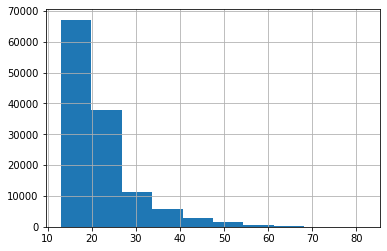

In [ ]:
# visualizando a distribuiçao de idades
dados['NU_IDADE'].hist()

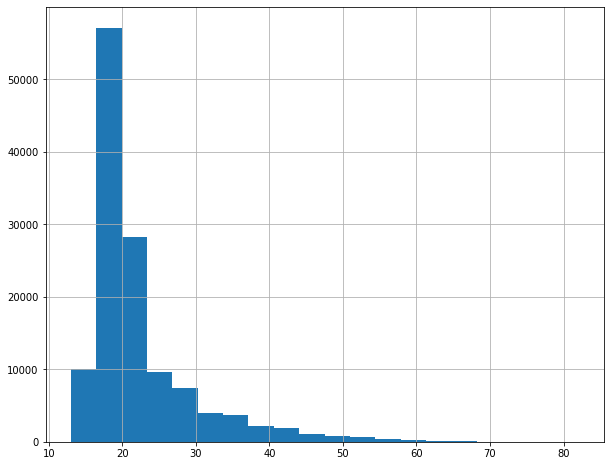

In [ ]:
dados['NU_IDADE'].hist(bins=20, figsize=(10,8))

Além disso, também podemos ter uma idéia da idade dos "candidatos treineiros":

In [ ]:
# quem são os alunos que fazem a prova como treineiros?
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

E podemos montar um _DataFrame_ apenas com a quantidade de candidatos em cada modalidade de acordo com a idade:

In [ ]:
# histogramas das idades dos treineiro e não treineiros
modalidades_por_idade = pd.merge(
    dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index(),
    dados.query("IN_TREINEIRO == 0")["NU_IDADE"].value_counts().sort_index(),
    how='outer', left_index=True, right_index=True, suffixes=('_TREINEIROS', '_PRA_VALER')
)
modalidades_por_idade.fillna(0, inplace=True)
modalidades_por_idade.astype('int32')

,NU_IDADE_TREINEIROS,NU_IDADE_PRA_VALER
13,0,4
14,64,77
15,1927,82
16,7142,688
17,4901,16355
...,...,...
73,0,2
75,0,2
76,0,1
77,0,1


e plotar um histograma com as duas distribuições:

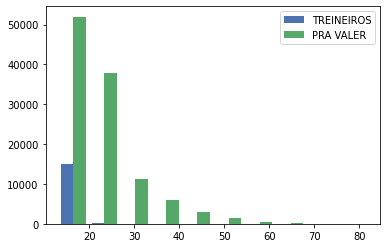

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

treineiros = dados.query("IN_TREINEIRO == 1")["NU_IDADE"]
pra_valer = dados.query("IN_TREINEIRO == 0")["NU_IDADE"]

plt.style.use('seaborn-deep')
plt.hist([treineiros, pra_valer], label=['TREINEIROS', 'PRA VALER'])
plt.legend(loc='upper right')
plt.show()

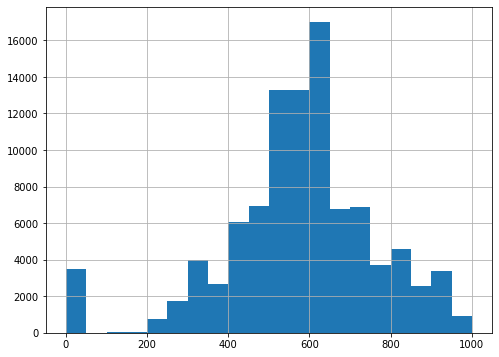

In [ ]:
# distribuicao notas de redação
dados['NU_NOTA_REDACAO'].hist(bins=20, figsize=(8,6))

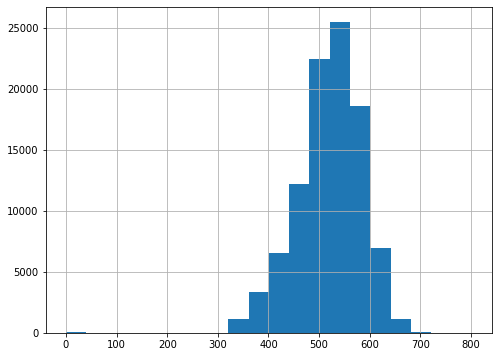

In [ ]:
# distribuicao notas de linguagens e códigos
dados['NU_NOTA_LC'].hist(bins=20, figsize=(8,6))

### Grandezas estátisticas

Vamos ver agora como calcular e obter os valores de algumas grandezas estátisticas.

In [ ]:
# média das notas de redação
dados['NU_NOTA_REDACAO'].mean()

571.5700253970197

In [ ]:
# desvio padrão
dados['NU_NOTA_REDACAO'].std()

188.07645455749753

In [ ]:
# colunas das notas de cada prova
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

# grandezas descritivas
dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [ ]:
# 10% das notas de matemática estão acima de:
dados['NU_NOTA_MT'].quantile(0.9)

596.3

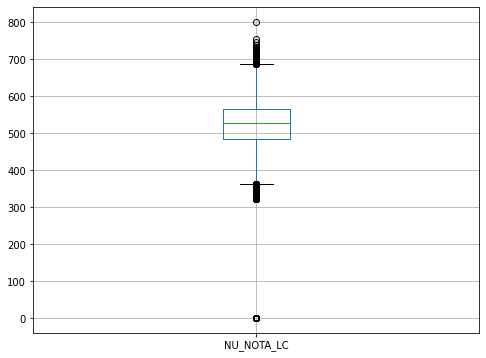

In [ ]:
dados['NU_NOTA_LC'].plot.box(grid=True, figsize=(8,6))

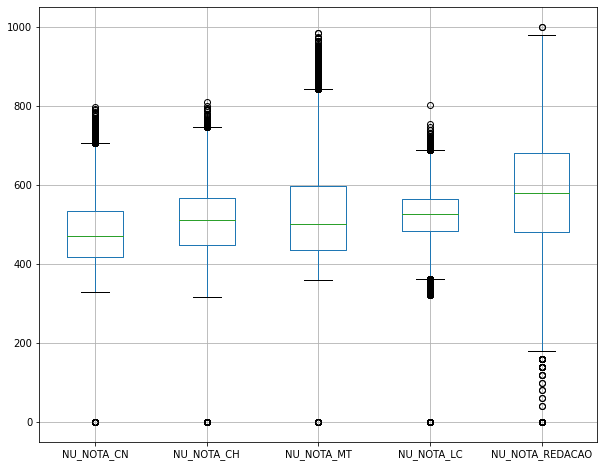

In [ ]:
dados[provas].plot.box(grid=True, figsize=(10,8))

In [ ]:
# distribuição das provas em ingles e espanhol